In [1]:
# imports needed in analysis process
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading the csv of online chess games

games = pd.read_csv("games.csv")

In [3]:
# Dataset shape

shape_before_cleaning = games.shape
print(shape_before_cleaning)

(20058, 16)


# DATA CLEANING:

In [4]:
games.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

(id) column shoudl be dropped becuase it will not be used and
will be an obstacle in droppping duplicate steps

In [5]:
# Dropping game's id column-

games = games.drop(['id'], axis = 1)

# Searching for duplicated values and droppping them -

print(f"No. of duplicate {games.duplicated().sum()} ")

No. of duplicate 429 


In [6]:
# Checking for null values to start cleaning data-

games.isna().sum()

rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Outliers in our dataset can be in a games which have huge gap
between player levels which is unfair

In [7]:
""" Creating columns of rating difference t          hat outliers will 
be detected according to it   """

games["rating_difference"] = abs(games['white_rating']- games['black_rating'])

In [8]:

#Function of outliers detiction
def find_outliers_IQR(df):
 q1=df.quantile(0.25)
 q3=df.quantile(0.75)
 IQR=q3-q1
 outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
 return outliers

In [9]:

outliers = find_outliers_IQR(games["rating_difference"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
print(outliers)
#Converting outliers series to a dataframe to drop rows with the
#same id from the main dataset
outliers =outliers.reset_index()


number of outliers: 969
max outlier value: 1605
min outlier value: 536
7        695
12       555
20       582
26       746
35       856
        ... 
19749    564
19859    571
19874    567
19921    771
20012    768
Name: rating_difference, Length: 969, dtype: int64


There are 969 matches that have huge gap btw players level

In [10]:
# Removing outliers 

games = games[~games.index.isin(outliers['index'])]

In [11]:
# Dropping rating difference column as it will not be used

games.drop(['rating_difference'], axis = 1)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


In [12]:
games

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_difference
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309
1,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61
2,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,4
3,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,15
4,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,471
20054,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,37
20055,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,67
20056,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,133


In [13]:
# Splitting the increment_code into two columns "time(min)" and
#        "increment(sec) and converting them into numerical data"

games[['time(min)', 'increment(sec)']] = games['increment_code'].str.split('+', expand = True)

games = games.drop(['increment_code'], axis = 1)

games['time(min)'] = games['time(min)'].astype('int64')
games['increment(sec)'] = games['increment(sec)'].astype('int64')


In [14]:
# Function to categorize game according to time-

def get_game_type(time):
    if time < 3:
        return 'Bullet'
    elif time < 10:
        return 'Blitz'
    elif time < 30:
        return 'Rapid'
    else:
        return 'Classic'
    
# Apply the function to create a new column
games['games_type'] = games['time(min)'].apply(get_game_type)

In [15]:
games.columns

Index(['rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'white_id', 'white_rating', 'black_id', 'black_rating',
       'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'rating_difference', 'time(min)', 'increment(sec)', 'games_type'],
      dtype='object')

In [16]:
# Function to categorize according to rating-

def get_player_lvl(rate):
    if rate <1200:
        return 'Begineer'
    elif rate < 1600:
        return 'Average'
    elif rate < 2000:
        return 'Advanced'
    else:
        return 'Master'

# Apply the function to create a new column

games['players_lvl'] = games['white_rating'].apply(get_player_lvl)


In [17]:
games['moves']

0        d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...
1        d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...
2        e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...
3        d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...
4        e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...
                               ...                        
20053    d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...
20054    d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...
20055    d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...
20056    e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...
20057    d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...
Name: moves, Length: 19089, dtype: object

In [18]:
games.head(2)

,rated,created_at,last_move_at,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rating_difference,time(min),increment(sec),games_type,players_lvl
0,False,1.504210e+12,1.504210e+12,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,309,15,2,Rapid,Average
1,True,1.504130e+12,1.504130e+12,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,61,5,10,Blitz,Average


In [19]:
# Using moves column important data which is the first move 
# that defines lines of the game 

# in chess first move is for white and second move is for black

games['wFirst_move'] = games['moves'].str.split(' ').str[0]





In [20]:
games['wFirst_move']

0        d4
1        d4
2        e4
3        d4
4        e4
         ..
20053    d4
20054    d4
20055    d4
20056    e4
20057    d4
Name: wFirst_move, Length: 19089, dtype: object

In [21]:
games['bFirst_move'] = games['moves'].str.split(' ').str[1]

In [22]:
games = games.drop(['created_at'], axis = 1)
games = games.drop(['last_move_at'], axis = 1)

In [23]:
# Data shape before and after removing unused cloumns and outliers

shape_after_cleaning = games.shape
print(f"Data shape before cleaning: {shape_before_cleaning}")
print(f"Data shape after cleaning: {shape_after_cleaning}")

Data shape before cleaning: (20058, 16)
Data shape after cleaning: (19089, 19)


In [24]:
games = games.drop(['rating_difference'], axis = 1)

In [25]:
games.columns

Index(['rated', 'turns', 'victory_status', 'winner', 'white_id',
       'white_rating', 'black_id', 'black_rating', 'moves', 'opening_eco',
       'opening_name', 'opening_ply', 'time(min)', 'increment(sec)',
       'games_type', 'players_lvl', 'wFirst_move', 'bFirst_move'],
      dtype='object')

# Data Exploration

In [26]:
# First 5 rows of dataset

games.head()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time(min),increment(sec),games_type,players_lvl,wFirst_move,bFirst_move
0,False,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,15,2,Rapid,Average,d4,d5
1,True,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,5,10,Blitz,Average,d4,Nc6
2,True,61,mate,white,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,5,10,Blitz,Average,e4,e5
3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,20,0,Rapid,Average,d4,d5
4,True,95,mate,white,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,30,3,Classic,Average,e4,e5


In [27]:
games.isna().sum()  # To check if there are any null values

rated             0
turns             0
victory_status    0
winner            0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
time(min)         0
increment(sec)    0
games_type        0
players_lvl       0
wFirst_move       0
bFirst_move       5
dtype: int64

In [28]:
# So we have 5 values in bFirst_move as null so we need to remove them 

games = games.dropna(subset= ['bFirst_move'])

In [29]:
games.isna().sum()

rated             0
turns             0
victory_status    0
winner            0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
time(min)         0
increment(sec)    0
games_type        0
players_lvl       0
wFirst_move       0
bFirst_move       0
dtype: int64

In [30]:
games.tail()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time(min),increment(sec),games_type,players_lvl,wFirst_move,bFirst_move
20053,True,24,resign,white,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,10,10,Rapid,Advanced,d4,f5
20054,True,82,mate,black,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,10,0,Rapid,Average,d4,d6
20055,True,35,mate,white,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,10,0,Rapid,Average,d4,d5
20056,True,109,resign,white,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,10,0,Rapid,Average,e4,d6
20057,True,78,mate,black,jamboger,1235,ffbob,1339,d4 d5 Bf4 Na6 e3 e6 c3 Nf6 Nf3 Bd7 Nbd2 b5 Bd3...,D00,Queen's Pawn Game: Mason Attack,3,10,0,Rapid,Average,d4,d5


In [31]:
# Random sample of rows in dataset

games.sample()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,time(min),increment(sec),games_type,players_lvl,wFirst_move,bFirst_move
7839,False,76,mate,black,anuj-8,1500,behnam2523,1500,e4 e5 Nf3 Nc6 Nc3 g6 Nd5 Bg7 d4 Nxd4 Nxd4 exd4...,C46,Three Knights Opening: Steinitz Defense,6,5,8,Blitz,Average,e4,e5


In [32]:
# Data type of all columns

games.dtypes

rated               bool
turns              int64
victory_status    object
winner            object
white_id          object
white_rating       int64
black_id          object
black_rating       int64
moves             object
opening_eco       object
opening_name      object
opening_ply        int64
time(min)          int64
increment(sec)     int64
games_type        object
players_lvl       object
wFirst_move       object
bFirst_move       object
dtype: object

In [33]:
# Statictics for every numeric column-

games.describe()

,turns,white_rating,black_rating,opening_ply,time(min),increment(sec)
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,61.052033,1591.557221,1586.134511,4.814766,13.681933,5.093377
std,33.663366,279.909468,281.258145,2.775351,16.667773,13.981718
min,2.000000,784.000000,791.000000,1.000000,0.000000,0.000000
25%,37.000000,1400.000000,1394.000000,3.000000,10.000000,0.000000
50%,56.000000,1565.000000,1560.000000,4.000000,10.000000,0.000000
75%,79.000000,1783.000000,1775.000000,6.000000,15.000000,7.000000
max,349.000000,2622.000000,2588.000000,28.000000,180.000000,180.000000


In [34]:
games.corr(numeric_only = True)

,rated,turns,white_rating,black_rating,opening_ply,time(min),increment(sec)
rated,1.000000,0.088502,0.043755,0.053061,0.004279,-0.103235,-0.083783
turns,0.088502,1.000000,0.149364,0.164329,0.050565,-0.055151,-0.057017
white_rating,0.043755,0.149364,1.000000,0.759872,0.279778,-0.074636,-0.035504
black_rating,0.053061,0.164329,0.759872,1.000000,0.271025,-0.076858,-0.034227
opening_ply,0.004279,0.050565,0.279778,0.271025,1.000000,-0.030881,-0.018035
time(min),-0.103235,-0.055151,-0.074636,-0.076858,-0.030881,1.000000,0.473647
increment(sec),-0.083783,-0.057017,-0.035504,-0.034227,-0.018035,0.473647,1.000000


In [35]:
# Number of rated and casual games

games['rated'].value_counts()

rated
True     15620
False     3464
Name: count, dtype: int64

In [36]:
# How a games can end

games['victory_status'].unique()

array(['outoftime', 'resign', 'mate', 'draw'], dtype=object)

In [37]:
# Number of games won by white or black o ended as a draw

games['winner'].value_counts()

winner
white    9494
black    8671
draw      919
Name: count, dtype: int64

In [38]:
# Format of game played the most

games['games_type'].value_counts()

games_type
Rapid      14018
Blitz       3771
Classic     1179
Bullet       116
Name: count, dtype: int64

In [39]:
# How many opening_eco codes in dataset

games['opening_eco'].nunique()

361

In [40]:
# How many openings used in all games

games['opening_name'].nunique()

1447

# Dats Analysis

# What percentage of games won by white or black

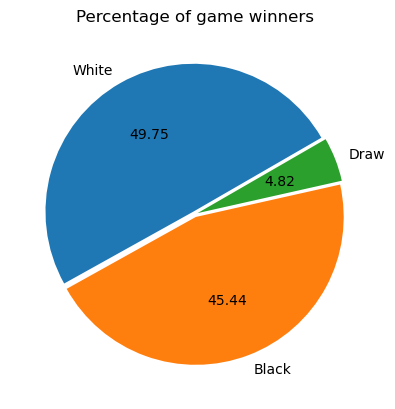

In [41]:
labels = ['White', 'Black', 'Draw']
plt.pie(games['winner'].value_counts(), labels = labels,
     autopct = '%1.2f', explode = [0.02,0.02,0.02],  startangle = 30)
plt.title('Percentage of game winners')
plt.show()



# How many games ended in a draw-

winner
white    9494
black    8671
draw      919
Name: count, dtype: int64


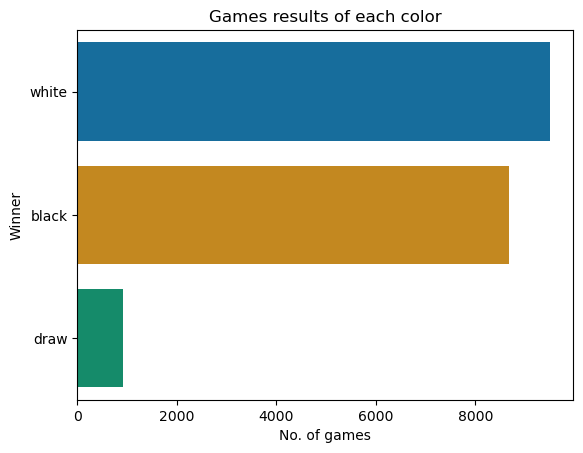

In [42]:
print(games['winner'].value_counts())
sns.countplot(data = games, y = 'winner', palette = 'colorblind')
plt.ylabel('Winner')
plt.xlabel('No. of games')
plt.title('Games results of each color')
plt.show()

# What is the most frequent used response move for black in games it won

In [51]:
games['winner'] == 'Black'

0        False
1        False
2        False
3        False
4        False
         ...  
20053    False
20054    False
20055    False
20056    False
20057    False
Name: winner, Length: 19084, dtype: bool

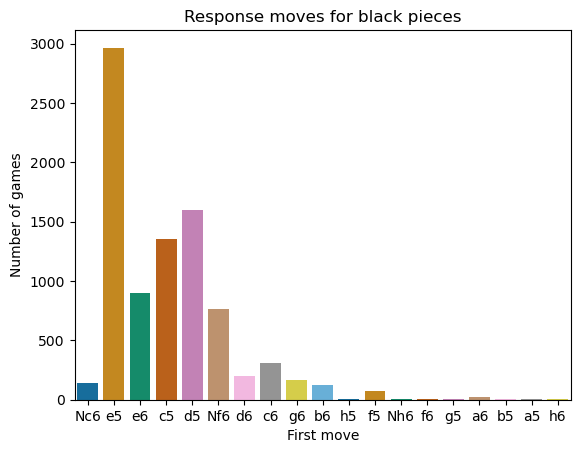

In [53]:
black_winner_games = games[games['winner'] == 'black']
sns.countplot(x = 'bFirst_move', data = black_winner_games, palette = 'colorblind')
plt.xlabel('First move')
plt.ylabel('Number of games')
plt.title('Response moves for black pieces')
plt.show()

# What is the most frequent used response move for white in games it won

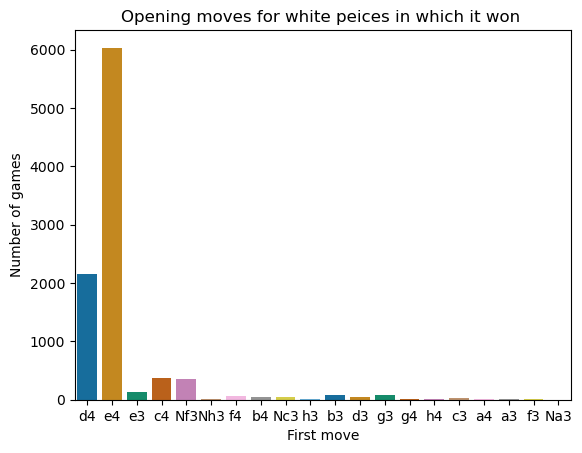

In [55]:
white_won_games = games[games['winner'] == 'white']
sns.countplot(x = 'wFirst_move', data = white_won_games, palette = 'colorblind')
plt.xlabel('First move')
plt.ylabel('Number of games')
plt.title('Opening moves for white peices in which it won ')
plt.show()

# Does the higher rated player always win ?

In [56]:
# Adding new column with boolean values if the higher rated player always win

def condition(row):
    if (row['black_rating'] > row['white_rating']) and row['winner'] == 'black' or (row['white_rating'] > row['black_rating'] and row['winner'] == 'white'):
        return True
    else:
        return False

games['higher_rated_win'] = games.apply(lambda row : condition(row), axis = 1)

This is giving you error becasue of the layout of our 
subplots or figure we will use matplotlib to control the placement

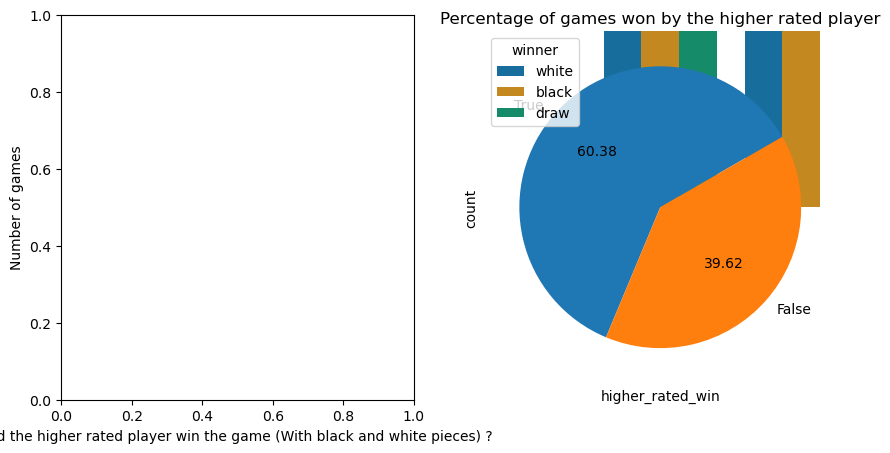

In [66]:
# Create a fig with two subplots ---
fig, ax = plt.subplots(1, 2, figsize= (10,5))

# First subplot : Countplot
sns.countplot(data = games, x = 'higher_rated_win', hue = 'winner', palette = 'colorblind')
ax[0].set_xlabel('Did the higher rated player win the game (With black and white pieces) ?')
ax[0].set_ylabel('Number of games')


# Second subplot : Pie chart

ax[1].pie(games['higher_rated_win'].value_counts(), labels = ['True', 'False'], 
               autopct = '%1.2f', startangle = 30)
ax[1].set_title('Percentage of games won by the higher rated player')
plt.show()

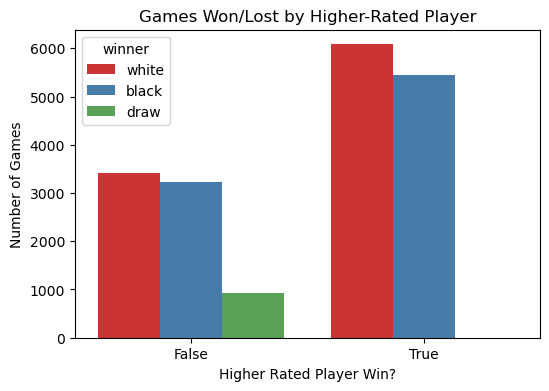

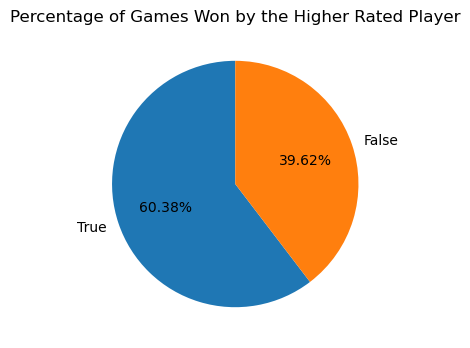

In [74]:
fig1, ax1 = plt.subplots(figsize=(6, 4))
sns.countplot(data=games, x='higher_rated_win',hue='winner',  palette='Set1', ax=ax1)
ax1.set_title('Games Won/Lost by Higher-Rated Player')
ax1.set_xlabel('Higher Rated Player Win?')
ax1.set_ylabel('Number of Games')

# Create the second figure and subplot
fig2, ax2 = plt.subplots(figsize=(6, 4))
games_pie = games['higher_rated_win'].value_counts()
ax2.pie(games_pie, labels=['True', 'False'], autopct='%1.2f%%', startangle=90)
ax2.set_title('Percentage of Games Won by the Higher Rated Player')

plt.show()


# Who is the most winning user and was he/she the highest rated player

In [75]:
# Adding new cloumn with id of the winning player of the game

def condition2(row):
    if row['winner'] == 'black':
        return row['black_id']
    elif row['winner'] == 'white':
        return row['white_id']
    else:
        return 'No Winner'

games['winner_Id'] = games.apply(lambda row : condition2(row), axis =1)